In [1]:
import pandas as pd

# Cargar el archivo Excel
file_path = "TAGUATO_19_03_2025-13_07_18_completo.xlsx"  # Reemplaza con la ubicación de tu archivo
df = pd.read_excel(file_path)

# Ver las primeras filas
df.head()

df = df.drop(columns=["DATE/TIME(America/Asuncion)"])

In [2]:
df.to_csv('taguato_chgpt.csv', index=False)

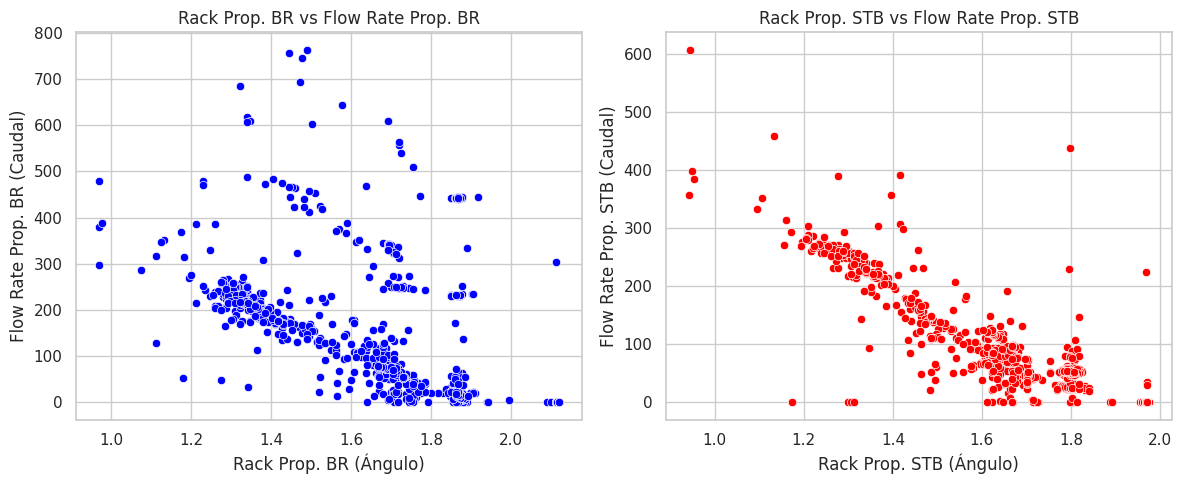

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Crear gráficos de dispersión para cada hélice
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico para la hélice de babor (BR)
sns.scatterplot(x=df["Rack Prop. BR"], y=df["Flow Rate Prop. BR"], ax=axes[0], color="blue")
axes[0].set_title("Rack Prop. BR vs Flow Rate Prop. BR")
axes[0].set_xlabel("Rack Prop. BR (Ángulo)")
axes[0].set_ylabel("Flow Rate Prop. BR (Caudal)")

# Gráfico para la hélice de estribor (STB)
sns.scatterplot(x=df["Rack Prop. STB"], y=df["Flow Rate Prop. STB"], ax=axes[1], color="red")
axes[1].set_title("Rack Prop. STB vs Flow Rate Prop. STB")
axes[1].set_xlabel("Rack Prop. STB (Ángulo)")
axes[1].set_ylabel("Flow Rate Prop. STB (Caudal)")

plt.tight_layout()
plt.show()


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 🔹 Eliminar NaN
# df = df.dropna()
df = df.fillna(df.median())

# 🔹 Separar variables de entrada (X) y salida (y)

X = df.drop(columns=["Flow Rate Prop. BR", "Flow Rate Prop. STB"])
y_BR = df["Flow Rate Prop. BR"]
y_STB = df["Flow Rate Prop. STB"]

# 🔹 Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_BR, y_test_BR = train_test_split(X_scaled, y_BR, test_size=0.2, random_state=42)
X_train, X_test, y_train_STB, y_test_STB = train_test_split(X_scaled, y_STB, test_size=0.2, random_state=42)

# 🔹 Definir la arquitectura de la red neuronal
def crear_modelo():
    model = keras.Sequential([
        keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(1, activation="linear")  # Salida lineal
    ])
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

# 🔹 Entrenar el modelo para BR
model_BR = crear_modelo()
history_BR = model_BR.fit(X_train, y_train_BR, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# 🔹 Entrenar el modelo para STB
model_STB = crear_modelo()
history_STB = model_STB.fit(X_train, y_train_STB, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# 🔹 Hacer predicciones
y_pred_BR = model_BR.predict(X_test)
y_pred_STB = model_STB.predict(X_test)

# 🔹 Evaluar los modelos
mse_BR = mean_squared_error(y_test_BR, y_pred_BR)
r2_BR = r2_score(y_test_BR, y_pred_BR)

mse_STB = mean_squared_error(y_test_STB, y_pred_STB)
r2_STB = r2_score(y_test_STB, y_pred_STB)

# 🔹 Mostrar los resultados
print(f"🔹 Red Neuronal - Flow Rate BR -> MSE: {mse_BR:.4f}, R²: {r2_BR:.4f}")
print(f"🔹 Red Neuronal - Flow Rate STB -> MSE: {mse_STB:.4f}, R²: {r2_STB:.4f}")


Epoch 1/100
51/51 [==============================] - 1s 6ms/step - loss: 13438.0381 - mae: 49.6933 - val_loss: 12493.6074 - val_mae: 45.7457
Epoch 2/100
51/51 [==============================] - 0s 4ms/step - loss: 8842.2344 - mae: 35.7334 - val_loss: 6358.5776 - val_mae: 26.6144
Epoch 3/100
51/51 [==============================] - 0s 4ms/step - loss: 5938.7007 - mae: 27.8735 - val_loss: 5449.5684 - val_mae: 27.2944
Epoch 4/100
51/51 [==============================] - 0s 4ms/step - loss: 5090.0405 - mae: 27.0059 - val_loss: 4959.7510 - val_mae: 29.8361
Epoch 5/100
51/51 [==============================] - 0s 4ms/step - loss: 4523.3599 - mae: 28.2414 - val_loss: 4844.2300 - val_mae: 28.7539
Epoch 6/100
51/51 [==============================] - 0s 4ms/step - loss: 4190.5728 - mae: 28.0713 - val_loss: 4846.0117 - val_mae: 30.2800
Epoch 7/100
51/51 [==============================] - 0s 4ms/step - loss: 4020.9944 - mae: 27.5881 - val_loss: 4904.5205 - val_mae: 29.9199
Epoch 8/100
51/51 [======

51/51 [==============================] - 0s 4ms/step - loss: 2218.2573 - mae: 17.8179 - val_loss: 5247.2695 - val_mae: 28.3109
Epoch 60/100
51/51 [==============================] - 0s 4ms/step - loss: 2205.0830 - mae: 17.5377 - val_loss: 5398.1968 - val_mae: 29.5339
Epoch 61/100
51/51 [==============================] - 0s 4ms/step - loss: 2202.0371 - mae: 17.6477 - val_loss: 5225.8125 - val_mae: 28.2426
Epoch 62/100
51/51 [==============================] - 0s 4ms/step - loss: 2189.2612 - mae: 17.5840 - val_loss: 5431.3667 - val_mae: 29.4569
Epoch 63/100
51/51 [==============================] - 0s 4ms/step - loss: 2250.2268 - mae: 17.9438 - val_loss: 5512.3394 - val_mae: 30.0587
Epoch 64/100
51/51 [==============================] - 0s 4ms/step - loss: 2174.0388 - mae: 17.4234 - val_loss: 5385.9165 - val_mae: 28.7253
Epoch 65/100
51/51 [==============================] - 0s 4ms/step - loss: 2171.3779 - mae: 17.3933 - val_loss: 5489.9570 - val_mae: 30.0571
Epoch 66/100
51/51 [=============

51/51 [==============================] - 0s 4ms/step - loss: 473.4855 - mae: 6.9368 - val_loss: 484.1693 - val_mae: 7.5688
Epoch 19/100
51/51 [==============================] - 0s 4ms/step - loss: 469.7769 - mae: 6.8288 - val_loss: 469.3485 - val_mae: 7.1971
Epoch 20/100
51/51 [==============================] - 0s 4ms/step - loss: 466.8704 - mae: 7.1635 - val_loss: 489.4475 - val_mae: 7.7763
Epoch 21/100
51/51 [==============================] - 0s 4ms/step - loss: 459.1537 - mae: 7.0975 - val_loss: 468.3000 - val_mae: 7.3029
Epoch 22/100
51/51 [==============================] - 0s 4ms/step - loss: 444.6969 - mae: 6.6217 - val_loss: 458.5690 - val_mae: 7.0569
Epoch 23/100
51/51 [==============================] - 0s 4ms/step - loss: 428.5659 - mae: 6.4785 - val_loss: 456.8777 - val_mae: 7.1129
Epoch 24/100
51/51 [==============================] - 0s 4ms/step - loss: 436.0136 - mae: 6.5306 - val_loss: 455.9615 - val_mae: 7.1421
Epoch 25/100
51/51 [==============================] - 0s 4ms/

51/51 [==============================] - 0s 4ms/step - loss: 243.6392 - mae: 5.2566 - val_loss: 459.4314 - val_mae: 6.9915
Epoch 79/100
51/51 [==============================] - 0s 4ms/step - loss: 246.3229 - mae: 5.1091 - val_loss: 463.2598 - val_mae: 7.0652
Epoch 80/100
51/51 [==============================] - 0s 4ms/step - loss: 236.1337 - mae: 5.1577 - val_loss: 451.7995 - val_mae: 6.8486
Epoch 81/100
51/51 [==============================] - 0s 4ms/step - loss: 237.0746 - mae: 5.0448 - val_loss: 447.5735 - val_mae: 6.9064
Epoch 82/100
51/51 [==============================] - 0s 4ms/step - loss: 224.9677 - mae: 4.8453 - val_loss: 483.4987 - val_mae: 7.4047
Epoch 83/100
51/51 [==============================] - 0s 4ms/step - loss: 239.4756 - mae: 5.3085 - val_loss: 504.1493 - val_mae: 7.7080
Epoch 84/100
51/51 [==============================] - 0s 4ms/step - loss: 225.8819 - mae: 4.9886 - val_loss: 463.2547 - val_mae: 7.1218
Epoch 85/100
51/51 [==============================] - 0s 4ms/

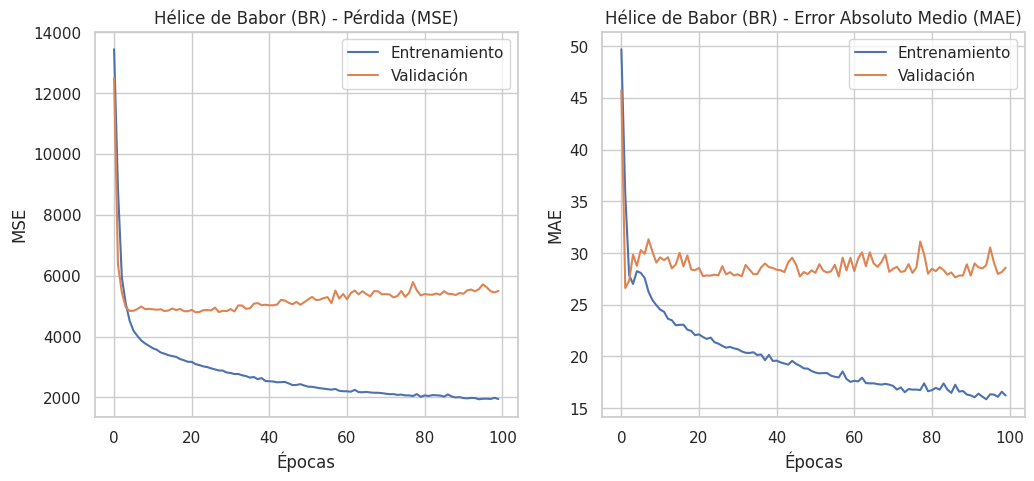

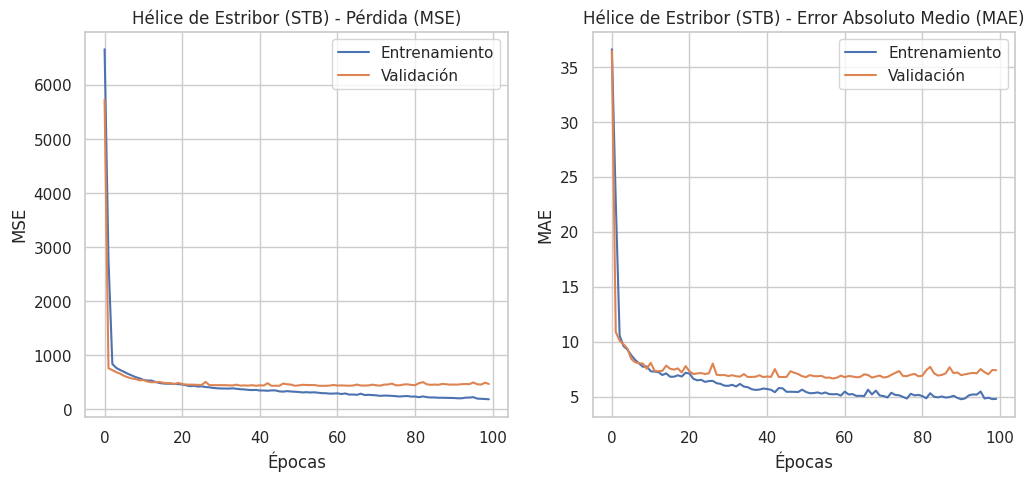

In [6]:
import matplotlib.pyplot as plt

# 🔹 Función para graficar la evolución del entrenamiento
def plot_history(history, title="Historial de Entrenamiento"):
    plt.figure(figsize=(12, 5))

    # 🔹 Gráfico de pérdida (MSE)
    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Entrenamiento")
    plt.plot(history.history["val_loss"], label="Validación")
    plt.xlabel("Épocas")
    plt.ylabel("MSE")
    plt.title(f"{title} - Pérdida (MSE)")
    plt.legend()

    # 🔹 Gráfico de MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history["mae"], label="Entrenamiento")
    plt.plot(history.history["val_mae"], label="Validación")
    plt.xlabel("Épocas")
    plt.ylabel("MAE")
    plt.title(f"{title} - Error Absoluto Medio (MAE)")
    plt.legend()

    plt.show()

# 🔹 Mostrar gráficos
plot_history(history_BR, title="Hélice de Babor (BR)")
plot_history(history_STB, title="Hélice de Estribor (STB)")


In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 🔹 Cargar los datos

# df = df.dropna()  # Eliminar filas con valores NaN
df = df.fillna(df.median())

# 🔹 Separar variables de entrada y salida
X = df.drop(columns=["Flow Rate Prop. BR", "Flow Rate Prop. STB"])
y_BR = df["Flow Rate Prop. BR"]
y_STB = df["Flow Rate Prop. STB"]

# 🔹 Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 Dividir en entrenamiento y prueba
X_train, X_test, y_train_BR, y_test_BR = train_test_split(X_scaled, y_BR, test_size=0.2, random_state=42)
X_train, X_test, y_train_STB, y_test_STB = train_test_split(X_scaled, y_STB, test_size=0.2, random_state=42)

# 🔹 Definir la nueva arquitectura de la red neuronal
def crear_modelo():
    model = keras.Sequential([
        Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation="relu"),
        Dense(1, activation="linear")  # Salida lineal
    ])
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

# 🔹 Entrenar el modelo para BR
model_BR = crear_modelo()
history_BR = model_BR.fit(X_train, y_train_BR, epochs=200, batch_size=32, validation_split=0.2, verbose=0)

# 🔹 Entrenar el modelo para STB
model_STB = crear_modelo()
history_STB = model_STB.fit(X_train, y_train_STB, epochs=200, batch_size=32, validation_split=0.2, verbose=0)

# 🔹 Hacer predicciones
y_pred_BR = model_BR.predict(X_test)
y_pred_STB = model_STB.predict(X_test)

# 🔹 Evaluar los modelos
mse_BR = mean_squared_error(y_test_BR, y_pred_BR)
r2_BR = r2_score(y_test_BR, y_pred_BR)

mse_STB = mean_squared_error(y_test_STB, y_pred_STB)
r2_STB = r2_score(y_test_STB, y_pred_STB)

# 🔹 Mostrar los resultados
print(f"🔹 Red Neuronal Ajustada - Flow Rate BR -> MSE: {mse_BR:.4f}, R²: {r2_BR:.4f}")
print(f"🔹 Red Neuronal Ajustada - Flow Rate STB -> MSE: {mse_STB:.4f}, R²: {r2_STB:.4f}")


16/16 [==============================] - 0s 1ms/step
🔹 Red Neuronal Ajustada - Flow Rate BR -> MSE: 3966.3719, R²: 0.6155
🔹 Red Neuronal Ajustada - Flow Rate STB -> MSE: 283.7665, R²: 0.9364


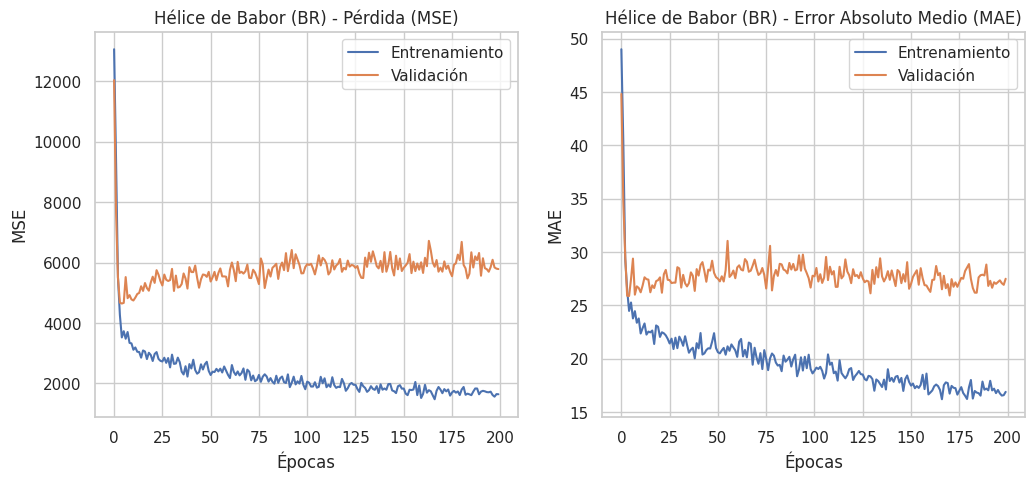

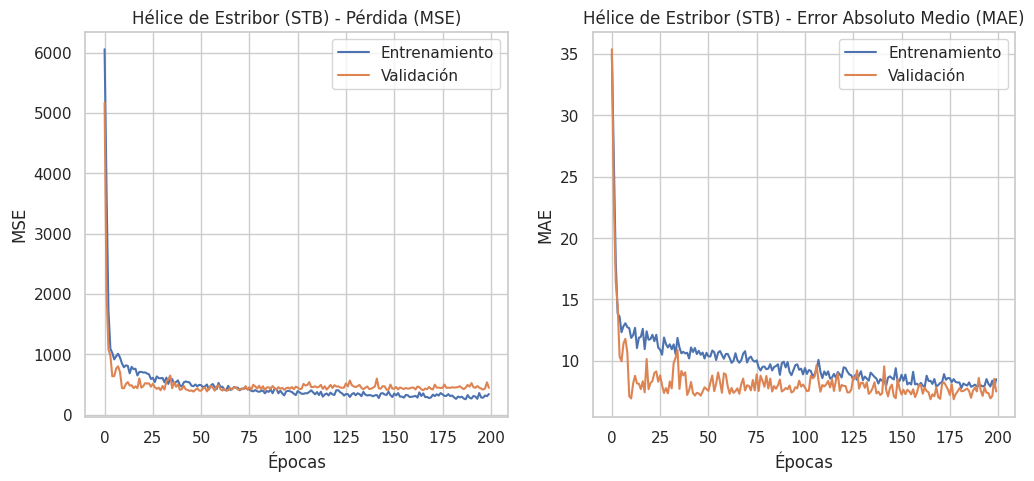

In [8]:
# 🔹 Función para graficar la evolución del entrenamiento
def plot_history(history, title="Historial de Entrenamiento"):
    plt.figure(figsize=(12, 5))

    # 🔹 Gráfico de pérdida (MSE)
    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Entrenamiento")
    plt.plot(history.history["val_loss"], label="Validación")
    plt.xlabel("Épocas")
    plt.ylabel("MSE")
    plt.title(f"{title} - Pérdida (MSE)")
    plt.legend()

    # 🔹 Gráfico de MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history["mae"], label="Entrenamiento")
    plt.plot(history.history["val_mae"], label="Validación")
    plt.xlabel("Épocas")
    plt.ylabel("MAE")
    plt.title(f"{title} - Error Absoluto Medio (MAE)")
    plt.legend()

    plt.show()

# 🔹 Mostrar gráficos
plot_history(history_BR, title="Hélice de Babor (BR)")
plot_history(history_STB, title="Hélice de Estribor (STB)")

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Definir variables independientes (X) y dependientes (y)
X = df[["Rack Prop. BR", "Rack Prop. STB"]]
y_BR = df["Flow Rate Prop. BR"]
y_STB = df["Flow Rate Prop. STB"]

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train_BR, y_test_BR = train_test_split(X, y_BR, test_size=0.2, random_state=42)
X_train, X_test, y_train_STB, y_test_STB = train_test_split(X, y_STB, test_size=0.2, random_state=42)

# Entrenar modelos de regresión lineal
model_BR = LinearRegression().fit(X_train, y_train_BR)
model_STB = LinearRegression().fit(X_train, y_train_STB)

# Hacer predicciones
y_pred_BR = model_BR.predict(X_test)
y_pred_STB = model_STB.predict(X_test)

# Evaluar el modelo
print("Modelo BR - R²:", r2_score(y_test_BR, y_pred_BR))
print("Modelo STB - R²:", r2_score(y_test_STB, y_pred_STB))


Modelo BR - R²: 0.5241966012912105
Modelo STB - R²: 0.9121658053065149


/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/oayala65/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


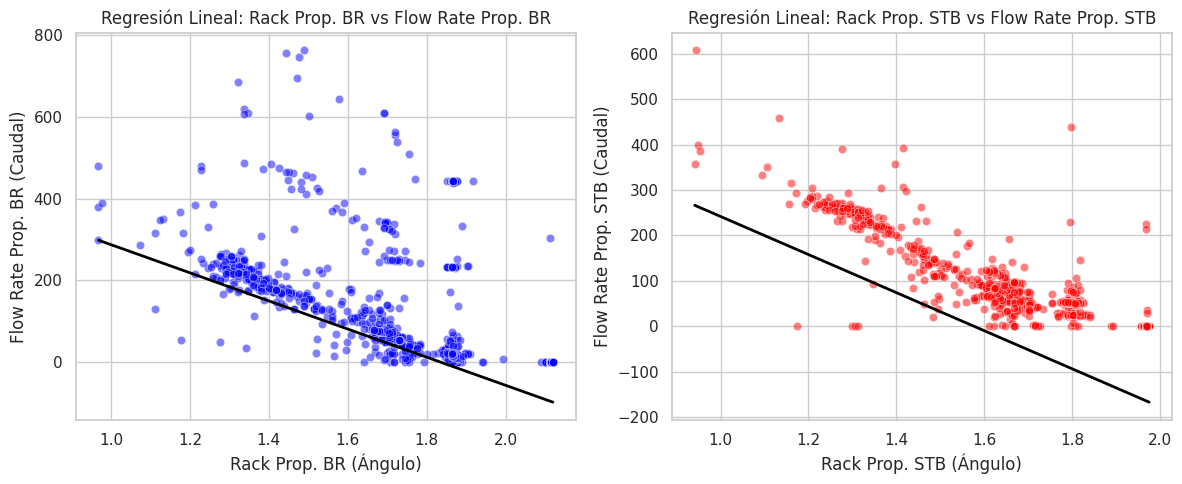

In [9]:
import numpy as np

# Crear figura para los gráficos de regresión
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Generar datos de predicción para la hélice de babor (BR)
x_range = np.linspace(df["Rack Prop. BR"].min(), df["Rack Prop. BR"].max(), 100).reshape(-1, 1)
y_pred_BR = model_BR.predict(np.column_stack((x_range, np.zeros_like(x_range))))

# Gráfico para la hélice de babor (BR)
sns.scatterplot(x=df["Rack Prop. BR"], y=df["Flow Rate Prop. BR"], ax=axes[0], color="blue", alpha=0.5)
axes[0].plot(x_range, y_pred_BR, color="black", linewidth=2)
axes[0].set_title("Regresión Lineal: Rack Prop. BR vs Flow Rate Prop. BR")
axes[0].set_xlabel("Rack Prop. BR (Ángulo)")
axes[0].set_ylabel("Flow Rate Prop. BR (Caudal)")

# Generar datos de predicción para la hélice de estribor (STB)
x_range = np.linspace(df["Rack Prop. STB"].min(), df["Rack Prop. STB"].max(), 100).reshape(-1, 1)
y_pred_STB = model_STB.predict(np.column_stack((np.zeros_like(x_range), x_range)))

# Gráfico para la hélice de estribor (STB)
sns.scatterplot(x=df["Rack Prop. STB"], y=df["Flow Rate Prop. STB"], ax=axes[1], color="red", alpha=0.5)
axes[1].plot(x_range, y_pred_STB, color="black", linewidth=2)
axes[1].set_title("Regresión Lineal: Rack Prop. STB vs Flow Rate Prop. STB")
axes[1].set_xlabel("Rack Prop. STB (Ángulo)")
axes[1].set_ylabel("Flow Rate Prop. STB (Caudal)")

plt.tight_layout()
plt.show()